Enter city name:  bhopal



📍 City: Bhopal
🌡 Temperature: 15.13 °C
☁ Condition: haze
🌅 Sunrise: 06:38
🌇 Sunset: 17:34

📅 5-Day Forecast:
2025-11-21: 16.87°C - 17.13°C | clear sky
2025-11-22: 15.87°C - 27.3°C | clear sky
2025-11-23: 16.15°C - 27.42°C | broken clouds
2025-11-24: 16.54°C - 27.39°C | clear sky
2025-11-25: 18.67°C - 27.23°C | few clouds
2025-11-26: 17.72°C - 27.03°C | scattered clouds


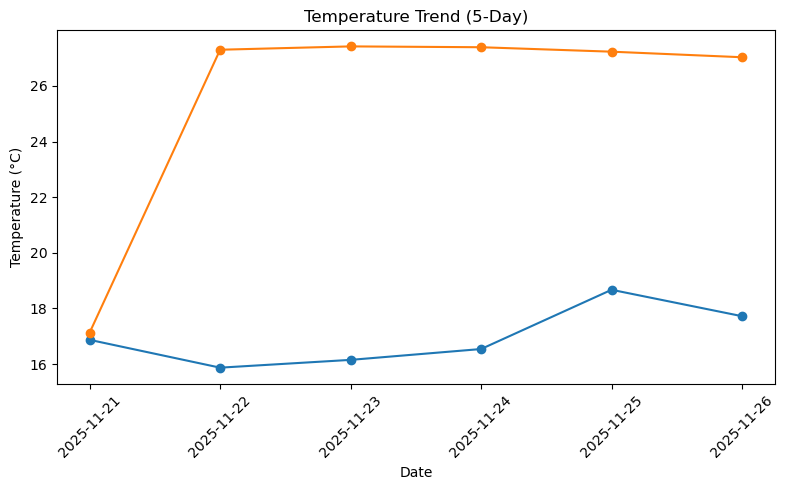

In [1]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt

API_KEY = "b2f02abb77ce5a2a3dcdf72356bcb1db"


# ---- 1. Get Current Weather ----
def get_current_weather(city):
    url = "https://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    data = requests.get(url, params=params).json()
    return data


# ---- 2. Get 5-Day Forecast (3-hour interval) ----
def get_forecast(city):
    url = "https://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    data = requests.get(url, params=params).json()
    return data


# ---- 3. Group Forecast by Day ----
def process_forecast(forecast_data):
    forecast_list = forecast_data["list"]

    days = {}
    for item in forecast_list: 
        date = item["dt_txt"].split(" ")[0]
        temp = item["main"]["temp"]
        condition = item["weather"][0]["description"]

        if date not in days:
            days[date] = {"temps": [], "condition": condition}

        days[date]["temps"].append(temp)

    return days


# ---- 4. Plot temperature graph ----
def plot_graph(days):
    dates = list(days.keys())
    min_temps = [min(days[d]["temps"]) for d in dates]
    max_temps = [max(days[d]["temps"]) for d in dates]

    plt.figure(figsize=(8, 5))
    plt.plot(dates, min_temps, marker='o')
    plt.plot(dates, max_temps, marker='o') 
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature Trend (5-Day)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ---- MAIN PROGRAM ----
city = input("Enter city name: ")

current = get_current_weather(city)

if current.get("cod") != 200:
    print("❌ Error:", current.get("message"))
    exit()

forecast = get_forecast(city)
days = process_forecast(forecast)

print("\n📍 City:", current["name"])
print("🌡 Temperature:", current["main"]["temp"], "°C")
print("☁ Condition:", current["weather"][0]["description"])
print("🌅 Sunrise:", datetime.fromtimestamp(current["sys"]["sunrise"]).strftime("%H:%M"))
print("🌇 Sunset:", datetime.fromtimestamp(current["sys"]["sunset"]).strftime("%H:%M"))

print("\n📅 5-Day Forecast:")
for d in days:
    print(f"{d}: {min(days[d]['temps'])}°C - {max(days[d]['temps'])}°C | {days[d]['condition']}")

plot_graph(days)
